# CNN 一般的結構如下：

1. 先透過卷積(Convolution)，由圖片中萃取線條特徵。
2. 再透過池化層(Pooling)，採樣保留最大值(特徵)。
3. 經過多次卷積/池化後，得到抽象化的特徵，壓扁為一維向量，作為完全連接層(Dense)的輸入。
4. 經完全連接層分類，進行影像辨識。

- 卷積神經網路(CNN)結構
![](https://ithelp.ithome.com.tw/upload/images/20200910/20001976mvGiGJxLdI.png)
- 卷積神經網路(CNN)處理
![](https://ithelp.ithome.com.tw/upload/images/20200911/20001976hZpvjwilnp.png)

# 以CNN辨識手寫阿拉伯數字(MNIST)

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

In [2]:
# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### CNN是允許彩色影像輸入，故輸入影像須加一個維度 -- 色彩。預測時，記得樣本也要加一維。

In [4]:
# # 加一個維度，MNIST是單色影像，故最後一維是 1，shape = (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [5]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

函數說明：

- Conv2D：2維的卷積層，32代表找出32個特徵(Feature Map)，kernel_size=(3, 3)為 3x3大小的卷積核或濾波器(Filter)。
- MaxPooling2D：2維的池化層，pool_size=(2, 2)為 2x2大小的池，計算後4個值取最大的保留下來。

In [6]:
from tensorflow.keras import layers

# 輸入的維度
input_shape = (28, 28, 1)

# 建立模型
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


In [7]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2343 - accuracy: 0.9279 - val_loss: 0.0758 - val_accuracy: 0.9774
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9724 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9789 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0383 - val_accuracy: 0.9884


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

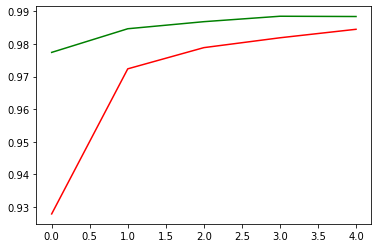

In [10]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')


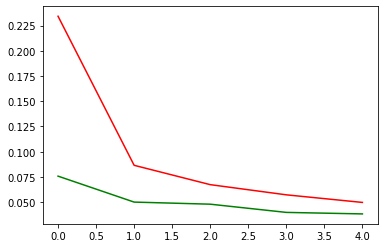

In [11]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')


In [12]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.032345451414585114, 0.9897000193595886]

In [13]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


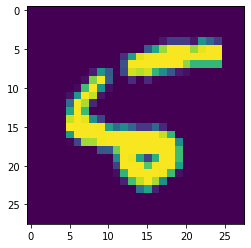

In [14]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [15]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = './myDigits/8.png'
image1 = io.imread(uploaded_file, as_gray=True)
#image1 = Image.open(uploaded_file).convert('LA')
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28, 1) #/ 255
# 反轉顏色
# 顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
X1 = np.abs(1-X1)
predictions = model.predict_classes(X1)
print(predictions)

[8]


In [16]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

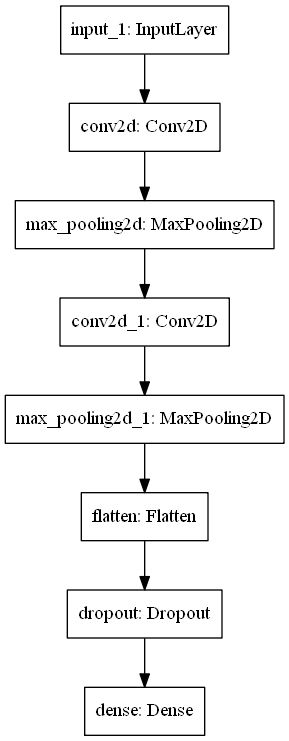

In [17]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='cnn_model.png')